### Text Mining assignment
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

### Importing Libraries

In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
iphone_reviews=[]

### Extracting reviews from snapdeal website

In [2]:
########### Extracting reviews from snapdeal website ##############

iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  
# adding the reviews of one page to empty list which in future contains all

In [3]:
### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [4]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [5]:
iphone_snapdeal

['Good buy at an affordable price during the sale.',
 'Very good one perfectly the original one with all original accessories',
 'got this at a great discount, the phone is worth it. my wife wanted to try an iphone and she is loving it now',
 'This a great experience to have a iphone, Snapdeal delivery was above expectation !!',
 'I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back',
 'I am very much happy with my product thanks to SNEPDEAL.',
 "It's cool phone, good processing with latest iOS. The cons are: Low memory space. There is total 8 gb space, and almost 6 gb are already filled u \xa0read more  ",
 'The product supplied by Snapdeal is very good at best price. It is as shown',
 'This is the first iPhone that I bought. After using android for 3 years, I was not satisfied with the performance. So, thought of going for iPhone. Though, I didnt want to go for iPhone 6S as it was very costly for me. So, decided th

### Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS

### load the dataset

In [7]:
ip_snapd=pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['Good buy at an affordable price during the sale.','Very good one perfectly the original one with all original accessories','got this at a great discount,the phone is worth it. my wife wanted to try an iphone and she is loving it now','This a great experience to have a iphone,Snapdeal delivery was above expectation !!','I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back','I am very much happy with my product thanks to SNEPDEAL.',"""It's cool phone",good processing with latest iOS. The cons are: Low memory space. There is total 8 gb space,...,'its nice to deal with Snapdeal. good shipping service at all...',"""I'm also happy with Snapdeal service""",'This product is awwsum in use... As by looks also.. I would defination prefer this nxt time also','I am happy with my new Iphone. Thanks you for providing me with the product of my choice with the best deal.','iphone really nice cell','Good i phone mobile oparating essy,inter net fast working','Mobile was got no hang smooth touch performing well','They have sold this Iphone on interest free emi scheme. Even though the phone was available from other sellers at a cheaper price. But no interest part has been credited to my account till now. Snapdeal hasnt taken any action on this issue. Dont buy on fraudulent schemes.','Awesome iphone in this price range.\ni would recommend this phone']


### Text processing

In [8]:
ip_snapd=' '.join(ip_snapd)
ip_snapd

'[\'Good buy at an affordable price during the sale.\'  \'Very good one perfectly the original one with all original accessories\'  \'got this at a great discount  the phone is worth it. my wife wanted to try an iphone and she is loving it now\'  \'This a great experience to have a iphone  Snapdeal delivery was above expectation !!\'  \'I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back\'  \'I am very much happy with my product thanks to SNEPDEAL.\'  "It\'s cool phone  good processing with latest iOS. The cons are: Low memory space. There is total 8 gb space  and almost 6 gb are already filled u \\xa0read more  "  \'The product supplied by Snapdeal is very good at best price. It is as shown\'  \'This is the first iPhone that I bought. After using android for 3 years  I was not satisfied with the performance. So  thought of going for iPhone. Though  I didnt want to go for iPhone 6S as it was very costly for me. So  

In [9]:
# Remove Punctuations 
no_punc_text=ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Good buy at an affordable price during the sale  Very good one perfectly the original one with all original accessories  got this at a great discount  the phone is worth it my wife wanted to try an iphone and she is loving it now  This a great experience to have a iphone  Snapdeal delivery was above expectation   I have got ths phone in perfect condition and thank you snapdeal for perfect eliveryi guess ur are earning the trust back  I am very much happy with my product thanks to SNEPDEAL  Its cool phone  good processing with latest iOS The cons are Low memory space There is total 8 gb space  and almost 6 gb are already filled u xa0read more    The product supplied by Snapdeal is very good at best price It is as shown  This is the first iPhone that I bought After using android for 3 years  I was not satisfied with the performance So  thought of going for iPhone Though  I didnt want to go for iPhone 6S as it was very costly for me So  decided that I will buy iPhone 5CnnSnapdeal has pro

In [10]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Good buy at an affordable price during the sale  Very good one perfectly the original one with all original accessories  got this at a great discount  the phone is worth it my wife wanted to try an iphone and she is loving it now  This a great experience to have a iphone  Snapdeal delivery was above expectation   I have got ths phone in perfect condition and thank you snapdeal for perfect eliveryi guess ur are earning the trust back  I am very much happy with my product thanks to SNEPDEAL  Its cool phone  good processing with latest iOS The cons are Low memory space There is total 8 gb space  and almost 6 gb are already filled u xa0read more    The product supplied by Snapdeal is very good at best price It is as shown  This is the first iPhone that I bought After using android for 3 years  I was not satisfied with the performance So  thought of going for iPhone Though  I didnt want to go for iPhone 6S as it was very costly for me So  decided that I will buy iPhone 5CnnSnapdeal has pro

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ravindra
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['Good', 'buy', 'at', 'an', 'affordable', 'price', 'during', 'the', 'sale', 'Very', 'good', 'one', 'perfectly', 'the', 'original', 'one', 'with', 'all', 'original', 'accessories', 'got', 'this', 'at', 'a', 'great', 'discount', 'the', 'phone', 'is', 'worth', 'it', 'my', 'wife', 'wanted', 'to', 'try', 'an', 'iphone', 'and', 'she', 'is', 'loving', 'it', 'now', 'This', 'a', 'great', 'experience', 'to', 'have', 'a', 'iphone', 'Snapdeal', 'delivery', 'was', 'above', 'expectation', 'I', 'have', 'got', 'ths', 'phone', 'in', 'perfect', 'condition', 'and', 'thank', 'you', 'snapdeal', 'for', 'perfect', 'eliveryi', 'guess', 'ur', 'are', 'earning', 'the', 'trust', 'back', 'I', 'am', 'very', 'much', 'happy', 'with', 'my', 'product', 'thanks', 'to', 'SNEPDEAL', 'Its', 'cool', 'phone', 'good', 'processing', 'with', 'latest', 'iOS', 'The', 'cons', 'are', 'Low', 'memory', 'space', 'There', 'is', 'total', '8', 'gb', 'space', 'and', 'almost', '6', 'gb', 'are', 'already', 'filled', 'u', 'xa0read', 'more', 

In [13]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\ravindra
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ravindra
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Tokens count
len(text_tokens)

1573

In [15]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Good', 'buy', 'affordable', 'price', 'sale', 'Very', 'good', 'one', 'perfectly', 'original', 'one', 'original', 'accessories', 'got', 'great', 'discount', 'phone', 'worth', 'wife', 'wanted', 'try', 'iphone', 'loving', 'This', 'great', 'experience', 'iphone', 'Snapdeal', 'delivery', 'expectation', 'got', 'ths', 'phone', 'perfect', 'condition', 'thank', 'snapdeal', 'perfect', 'eliveryi', 'guess', 'ur', 'earning', 'trust', 'back', 'much', 'happy', 'product', 'thanks', 'SNEPDEAL', 'Its', 'cool', 'phone', 'good', 'processing', 'latest', 'iOS', 'The', 'cons', 'Low', 'memory', 'space', 'There', 'total', '8', 'gb', 'space', 'almost', '6', 'gb', 'already', 'filled', 'u', 'xa0read', 'The', 'product', 'supplied', 'Snapdeal', 'good', 'best', 'price', 'It', 'shown', 'This', 'first', 'iPhone', 'bought', 'After', 'using', 'android', '3', 'years', 'satisfied', 'performance', 'So', 'thought', 'going', 'iPhone', 'Though', 'didnt', 'want', 'go', 'iPhone', '6S', 'costly', 'So', 'decided', 'buy', 'iPhone

In [16]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['go', 'iphone', '6s', 'costly', 'so', 'decided', 'buy', 'iphone', '5cnnsnapdeal', 'provided', 'great', 'deal', 'compared', 'sites', 'also', 'delivery', 'prompt', 'wellnnpros', 'sleek', 'phone', 'looks', 'sexy', 'lags', 'really', 'great', 'headphone', 'got', 'upgrade', 'ios', '9nncons', 'plastic', 'body', 'good', 'product', 'packing', 'also', 'good', 'issue', 'courier', 'servicethey', 'took', '10', 'days', 'deliver', 'awesome', 'mobile', 'working', 'smooth', 'like', 'apple', 'iphone', 'hahahaha', 'cool', 'good', 'phone', 'the', 'os', 'take', 'around', '5gb', 'leaving', '3', 'gb', 'files', 'unless', 'youre', 'heavy', 'files', 'user', 'amazing', 'product', 'priceat', 'first', 'reluctant', 'buy', 'apple', 'product', 'snapdeal', 'deal', 'made', 'crazy', 'n', 'ordered', 'fingers', 'cr', 'xa0read', 'good', 'product', 'satisfied', 'got', 'snapdeal', 'superb', 'model', 'snapdeal', 'delivered', 'promised', 'time', 'a', 'mush', 'deal']


In [17]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['go', 'iphon', '6s', 'costli', 'so', 'decid', 'buy', 'iphon', '5cnnsnapdeal', 'provid', 'great', 'deal', 'compar', 'site', 'also', 'deliveri', 'prompt', 'wellnnpro', 'sleek', 'phone', 'look', 'sexi', 'lag', 'realli', 'great', 'headphon', 'got', 'upgrad', 'io', '9nncon', 'plastic', 'bodi', 'good', 'product', 'pack', 'also', 'good', 'issu', 'courier', 'servicethey', 'took', '10', 'day', 'deliv', 'awesom', 'mobil', 'work', 'smooth', 'like', 'appl', 'iphon', 'hahahaha', 'cool', 'good', 'phone', 'the', 'os', 'take', 'around', '5gb', 'leav', '3', 'gb', 'file', 'unless', 'your', 'heavi', 'file', 'user', 'amaz', 'product', 'priceat', 'first', 'reluct', 'buy', 'appl', 'product', 'snapdeal', 'deal', 'made', 'crazi', 'n', 'order', 'finger', 'cr', 'xa0read', 'good', 'product', 'satisfi', 'got', 'snapdeal', 'superb', 'model', 'snapdeal', 'deliv', 'promis', 'time', 'a', 'mush', 'deal']


In [18]:
!pip3 install en_core_web_sm
!python -m spacy download %


[x] No compatible package found for '%' (spaCy v3.4.4)



In [19]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

good buy affordable price sale very good one perfectly original one original accessories got great discount phone worth wife wanted try iphone loving this great experience iphone snapdeal delivery expectation got ths phone perfect condition thank snapdeal perfect eliveryi guess ur earning trust back much happy product thanks snepdeal its cool phone good processing latest ios the cons low memory space there total 8 gb space almost 6 gb already filled u xa0read the product supplied snapdeal good best price it shown this first iphone bought after using android 3 years satisfied performance so thought going iphone though didnt want go iphone 6s costly so decided buy iphone 5cnnsnapdeal provided great deal compared sites also delivery prompt wellnnpros sleek phone looks sexy lags really great headphone got upgrade ios 9nncons plastic body good product packing also good issue courier servicethey took 10 days deliver awesome mobile working smooth like apple iphone hahahaha cool good phone the

In [20]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['good', 'buy', 'affordable', 'price', 'sale', 'very', 'good', 'one', 'perfectly', 'original', 'one', 'original', 'accessory', 'get', 'great', 'discount', 'phone', 'worth', 'wife', 'want', 'try', 'iphone', 'love', 'this', 'great', 'experience', 'iphone', 'snapdeal', 'delivery', 'expectation', 'get', 'th', 'phone', 'perfect', 'condition', 'thank', 'snapdeal', 'perfect', 'eliveryi', 'guess', 'ur', 'earn', 'trust', 'back', 'much', 'happy', 'product', 'thank', 'snepdeal', 'its', 'cool', 'phone', 'good', 'processing', 'late', 'io', 'the', 'con', 'low', 'memory', 'space', 'there', 'total', '8', 'gb', 'space', 'almost', '6', 'gb', 'already', 'fill', 'u', 'xa0read', 'the', 'product', 'supply', 'snapdeal', 'good', 'good', 'price', 'it', 'show', 'this', 'first', 'iphone', 'buy', 'after', 'use', 'android', '3', 'year', 'satisfied', 'performance', 'so', 'think', 'go', 'iphone', 'though', 'do', 'not', 'want', 'go', 'iphone', '6s', 'costly', 'so', 'decide', 'buy', 'iphone', '5cnnsnapdeal', 'provide'

In [21]:
clean_comments=' '.join(lemmas)
clean_comments

'good buy affordable price sale very good one perfectly original one original accessory get great discount phone worth wife want try iphone love this great experience iphone snapdeal delivery expectation get th phone perfect condition thank snapdeal perfect eliveryi guess ur earn trust back much happy product thank snepdeal its cool phone good processing late io the con low memory space there total 8 gb space almost 6 gb already fill u xa0read the product supply snapdeal good good price it show this first iphone buy after use android 3 year satisfied performance so think go iphone though do not want go iphone 6s costly so decide buy iphone 5cnnsnapdeal provide great deal compare site also delivery prompt wellnnpro sleek phone look sexy lag really great headphone got upgrade ios 9nncons plastic body good product pack also good issue courier servicethey take 10 day deliver awesome mobile work smooth like apple iphone hahahaha cool good phone the os take around 5 gb leave 3 gb file unless

## Feature Extaction
### 1. Using CountVectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
clean_commentscv=cv.fit_transform(lemmas)

In [23]:
print(cv.vocabulary_)

{'good': 144, 'buy': 54, 'affordable': 17, 'price': 256, 'sale': 298, 'very': 392, 'one': 228, 'perfectly': 242, 'original': 234, 'accessory': 12, 'get': 139, 'great': 149, 'discount': 100, 'phone': 245, 'worth': 406, 'wife': 399, 'want': 393, 'try': 381, 'iphone': 174, 'love': 194, 'this': 364, 'experience': 120, 'snapdeal': 334, 'delivery': 96, 'expectation': 119, 'th': 355, 'perfect': 241, 'condition': 73, 'thank': 356, 'eliveryi': 111, 'guess': 150, 'ur': 386, 'earn': 109, 'trust': 380, 'back': 37, 'much': 211, 'happy': 153, 'product': 264, 'snepdeal': 336, 'its': 181, 'cool': 77, 'processing': 263, 'late': 186, 'io': 171, 'the': 359, 'con': 72, 'low': 196, 'memory': 204, 'space': 340, 'there': 360, 'total': 374, 'gb': 137, 'almost': 19, 'already': 20, 'fill': 127, 'xa0read': 408, 'supply': 349, 'it': 178, 'show': 323, 'first': 130, 'after': 18, 'use': 387, 'android': 26, 'year': 409, 'satisfied': 301, 'performance': 244, 'so': 337, 'think': 363, 'go': 143, 'though': 366, 'do': 103

In [27]:
print(cv.get_feature_names_out()[100:200])

['discount' 'dispatchnprosn1' 'display' 'do' 'doubt' 'doubtfull' 'dream'
 'dt' 'due' 'earn' 'easy' 'eliveryi' 'emi' 'essy' 'even' 'ever' 'everyone'
 'everything' 'excellent' 'expectation' 'experience' 'fake' 'family'
 'fast' 'feature' 'feel' 'file' 'fill' 'find' 'finger' 'first' 'five'
 'flaw' 'fraudulent' 'free' 'friend' 'fully' 'gb' 'genuine' 'get' 'gets'
 'getting' 'gift' 'go' 'good' 'goodbut' 'goood' 'got' 'grand' 'great'
 'guess' 'hahahaha' 'hang' 'happy' 'happyalso' 'have' 'headphone' 'hear'
 'heat' 'heavy' 'hesitate' 'honest' 'honestly' 'hour' 'however' 'hv' 'in'
 'initially' 'inter' 'interaction' 'interest' 'io' 'ios' 'ios9' 'iphone'
 'iphone5c' 'iphoneearli' 'issue' 'it' 'item' 'itnniphone' 'its' 'job'
 'lack' 'lag' 'lagging' 'late' 'leave' 'level' 'like' 'limit'
 'listnnapple' 'little' 'look' 'love' 'lovely' 'low' 'make' 'manufacturer'
 'mark']


In [28]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
print(clean_commentscv.toarray().shape)

(1028, 411)


### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [30]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [32]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['100' '5c' 'also' 'amazing' 'and' 'apple' 'awesome' 'battery' 'be' 'body'
 'box' 'brand' 'budget' 'but' 'buy' 'camera' 'cheap' 'condition' 'cool'
 'day' 'deal' 'deliver' 'delivery' 'do' 'even' 'excellent' 'experience'
 'fast' 'file' 'gb' 'genuine' 'get' 'go' 'good' 'got' 'great' 'happy'
 'have' 'interest' 'io' 'iphone' 'issue' 'it' 'its' 'late' 'like' 'look'
 'low' 'memory' 'mobile' 'need' 'new' 'nice' 'not' 'one' 'order'
 'original' 'pack' 'perfect' 'phone' 'plastic' 'price' 'problem' 'product'
 'quality' 'really' 'receive' 'recommend' 'satisfactory' 'satisfied' 'say'
 'scheme' 'seller' 'service' 'shipping' 'shop' 'site' 'snap' 'snapdeal'
 'so' 'space' 'superb' 'take' 'thank' 'the' 'this' 'though' 'till' 'time'
 'transfer' 'true' 'use' 'very' 'want' 'well' 'within' 'work' 'worth'
 'would' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 3. TF-IDF Vectorizer

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [35]:
print(tfidfv_ngram_max_features.get_feature_names_out())
print(tfidf_matix_ngram.toarray())

['10' '100' '1000rs' '2030' '20k' '24' '2nd' '5c' '5cnnsnapdeal' '6s'
 '9nncons' 'absolutly' 'accessory' 'account' 'action' 'ad' 'adorable'
 'affordable' 'after' 'almost' 'already' 'also' 'always' 'amazing' 'and'
 'andriodblackberrywindow' 'android' 'app' 'apple' 'around' 'as'
 'attractive' 'available' 'awesome' 'awesum' 'awsme' 'awwsum' 'back'
 'battery' 'be' 'beatifully' 'beautiful' 'believe' 'bit' 'bluetooth'
 'body' 'bodyn2' 'box' 'brand' 'bt' 'budget' 'build' 'business' 'but'
 'buy' 'camera' 'can' 'capacity' 'care' 'category' 'cell' 'charge' 'cheap'
 'choice' 'choose' 'class' 'close' 'colour' 'come' 'commit' 'compare'
 'competitive' 'con' 'condition' 'conditionnno' 'consist' 'contact' 'cool'
 'costly' 'coupon' 'courier' 'cr' 'crazy' 'credit' 'crisp' 'customer'
 'damage' 'dat' 'datum' 'day' 'daynand' 'deal' 'dear' 'decide'
 'defination' 'deliver' 'delivery' 'delivry' 'dere' 'dis' 'discount'
 'dispatchnprosn1' 'display' 'do' 'doubt' 'doubtfull' 'dream' 'dt' 'due'
 'earn' 'easy' 'eli

### Generate Word Cloud

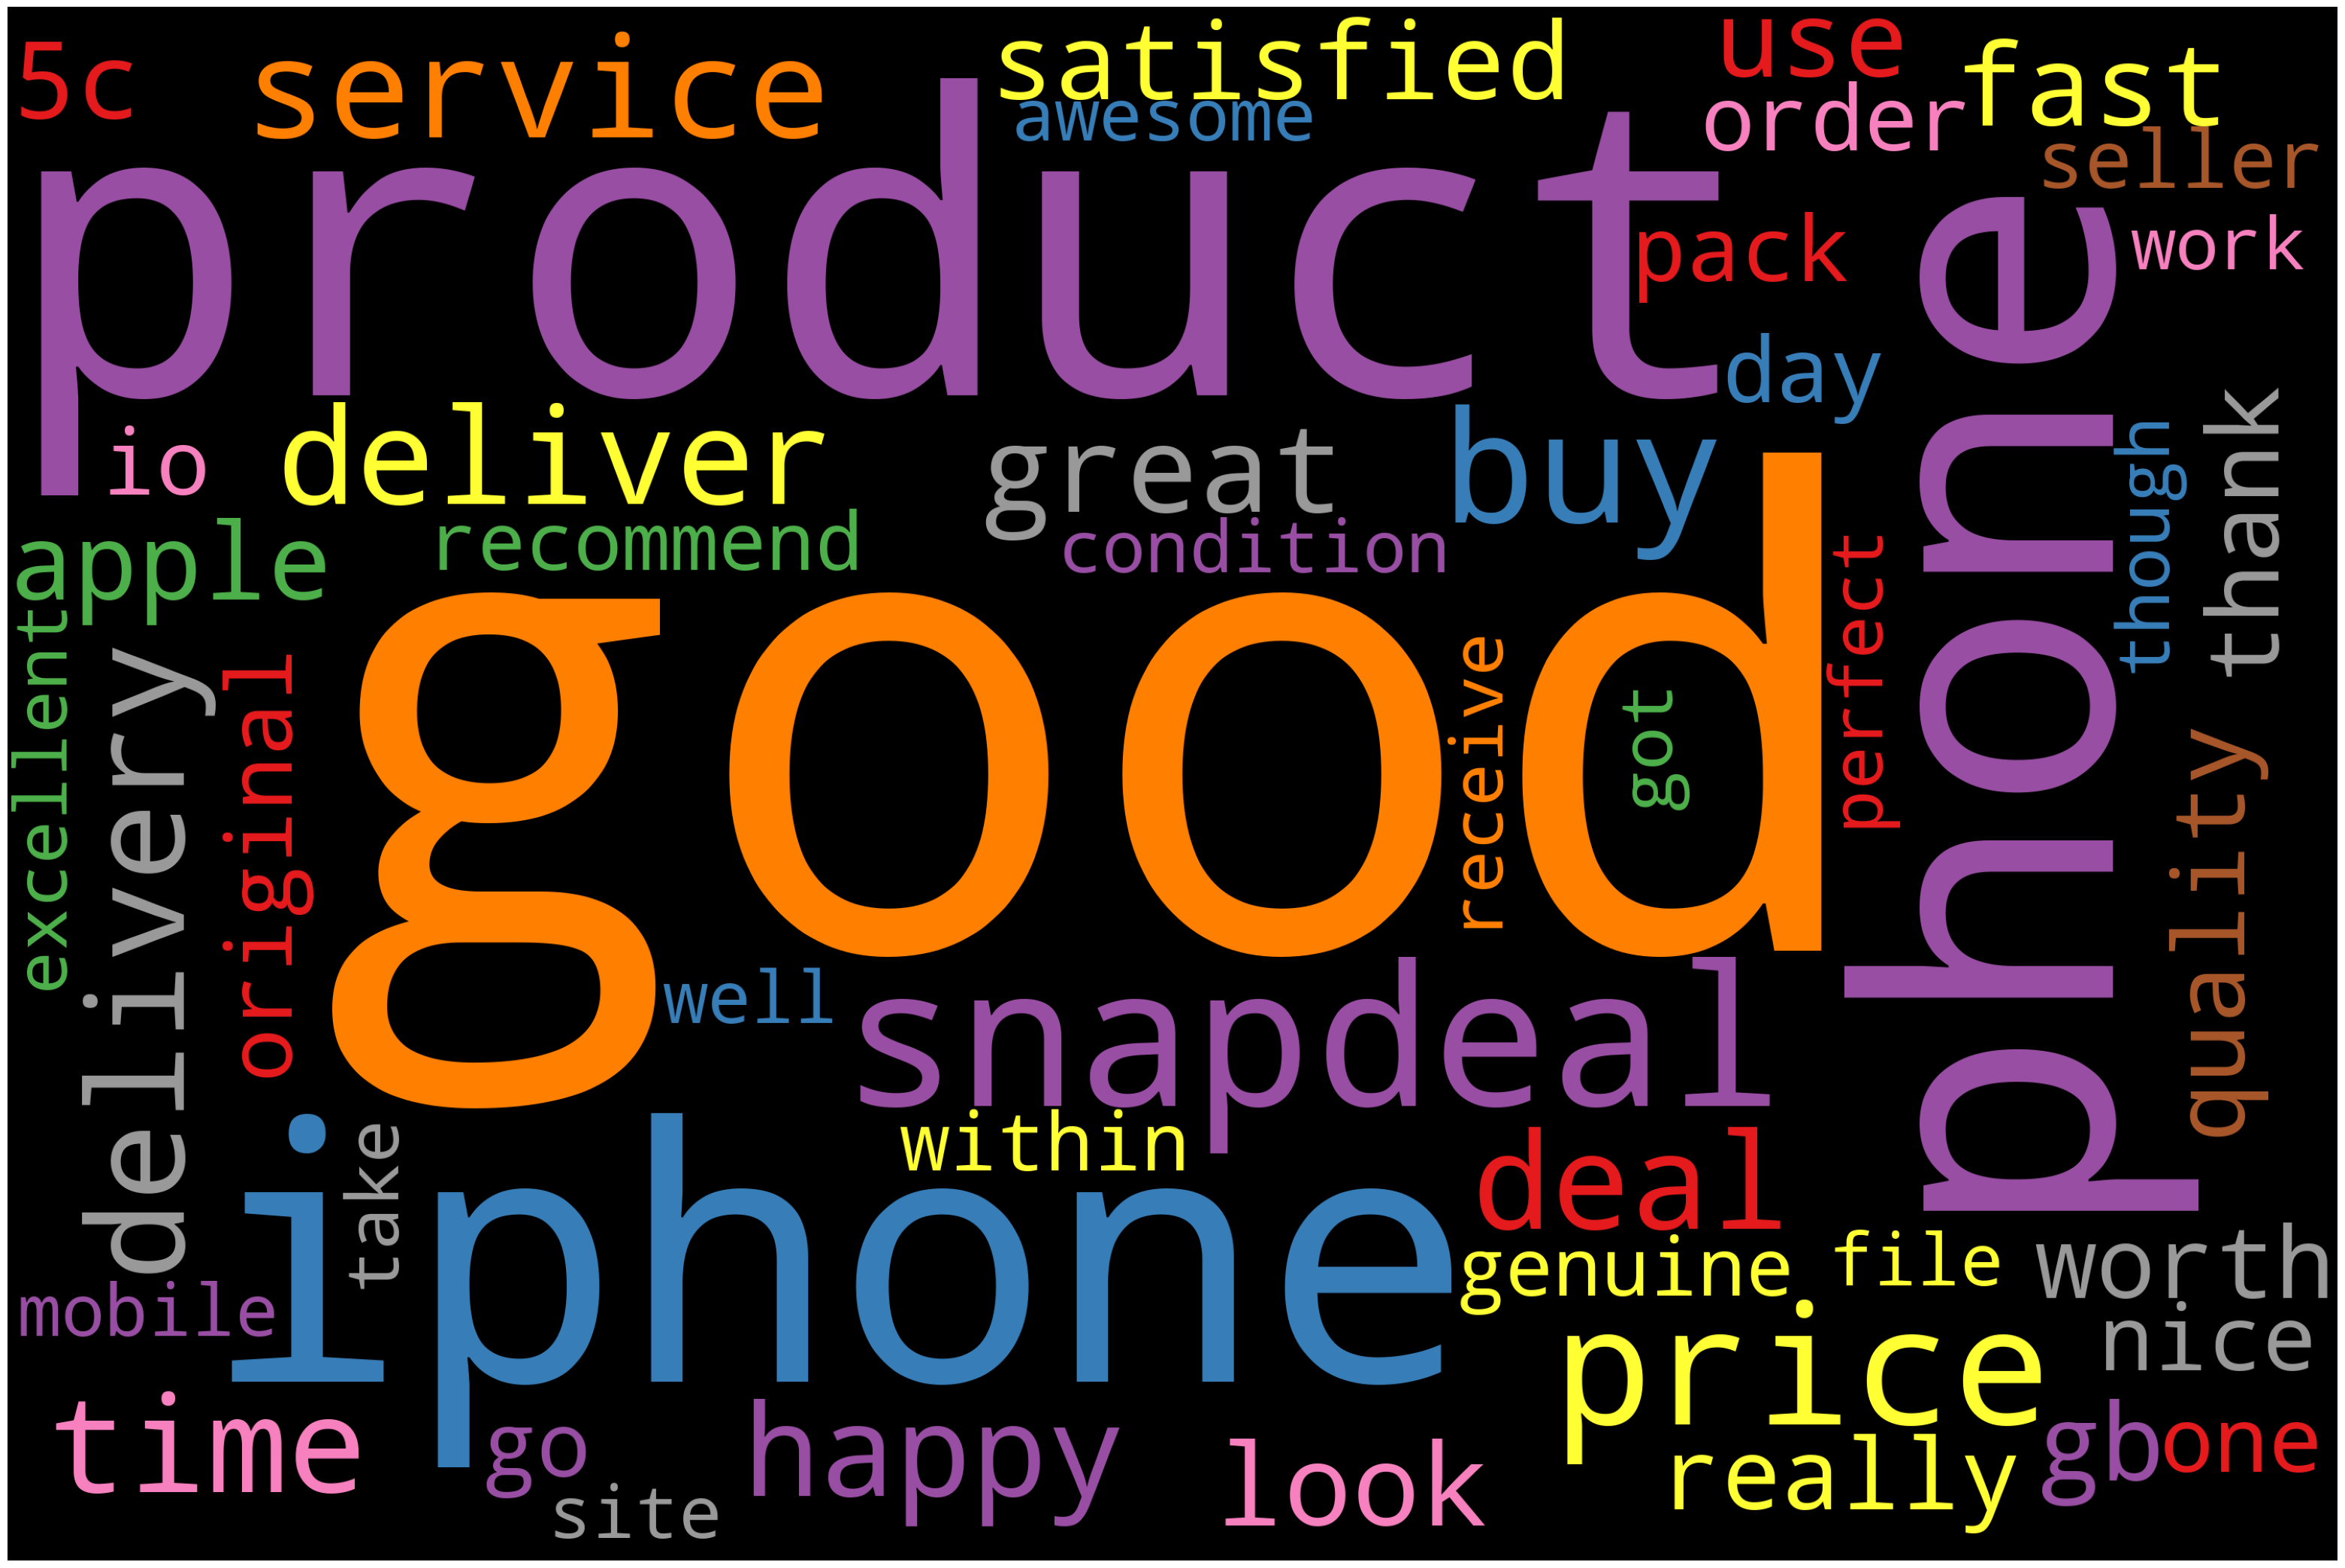

In [36]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_comments)
plot_cloud(wordcloud)

### Named Entity Recognition (NER)

In [37]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_comments
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [38]:
for token in doc_block[100:200]:
    print(token,token.pos_)

want VERB
go VERB
iphone NOUN
6s NUM
costly ADJ
so ADV
decide VERB
buy VERB
iphone NOUN
5cnnsnapdeal PRON
provide VERB
great ADJ
deal NOUN
compare VERB
site NOUN
also ADV
delivery NOUN
prompt NOUN
wellnnpro NOUN
sleek ADJ
phone NOUN
look NOUN
sexy ADJ
lag NOUN
really ADV
great ADJ
headphone NOUN
got AUX
upgrade VERB
ios ADJ
9nncons NUM
plastic NOUN
body NOUN
good ADJ
product NOUN
pack NOUN
also ADV
good ADJ
issue NOUN
courier NOUN
servicethey PRON
take VERB
10 NUM
day NOUN
deliver VERB
awesome ADJ
mobile ADJ
work NOUN
smooth ADJ
like ADP
apple NOUN
iphone NOUN
hahahaha NOUN
cool VERB
good ADJ
phone NOUN
the DET
os NOUN
take VERB
around ADV
5 NUM
gb NOUN
leave VERB
3 NUM
gb NOUN
file NOUN
unless SCONJ
you PRON
re VERB
heavy ADJ
file NOUN
user NOUN
amazing ADJ
product NOUN
priceat NOUN
first ADV
reluctant ADJ
buy VERB
apple NOUN
product NOUN
snapdeal ADJ
deal NOUN
make VERB
crazy ADJ
n DET
order NOUN
finger PROPN
cr PROPN
xa0read PROPN
good ADJ
product NOUN
satisfied ADJ
get VERB
snapdea

In [39]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['superb', 'model', 'deliver', 'promise', 'time', 'mush', 'deal', 'product', 'phone', 'lack', 'feel', 'awesum', 'phonegood', 'price', 'productiphone', 'quality', 'product', 'delivery', 'time', 'phone', 'price', 'category', 'manufacturer', 'warranty', 'd', 'phone', 'good', 'io', 'd', 'phone', 'look', 'plastic', 'body', 'metal', 'body', 'look', 'mean', 'plastic', 'body', 'look', 'plastic', 'look', 'camera', 'superb', 'battery', 'dere', 'problem', 'say', 'dis', 'phone', 'problem', 'choose', 'gb', 'phone', 'flaw', 'word', 'say', 'phone', 'price', 'thumb', 'apple', 'product', 'service', 'snap', 'deal', 'buy', 'product', 'speak', 'hesitate', 'review', 'review', 'damage', 'reputation', 'service', 'product', 'service', 'believe', 'rumour', 'go', 'star', 'thank', 'shopping', 'experience', 'm', 'service', 'recommend', 'service', 'promptness', 'delivery', 'product', 'receive', 'product', 'hang', 'product', 'use', 'use', 'take', 'contact', 'quality', 'product']


In [40]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,product,40
1,phone,28
2,iphone,27
3,price,17
4,buy,15
5,service,12
6,delivery,11
7,deal,11
8,deliver,11
9,time,11


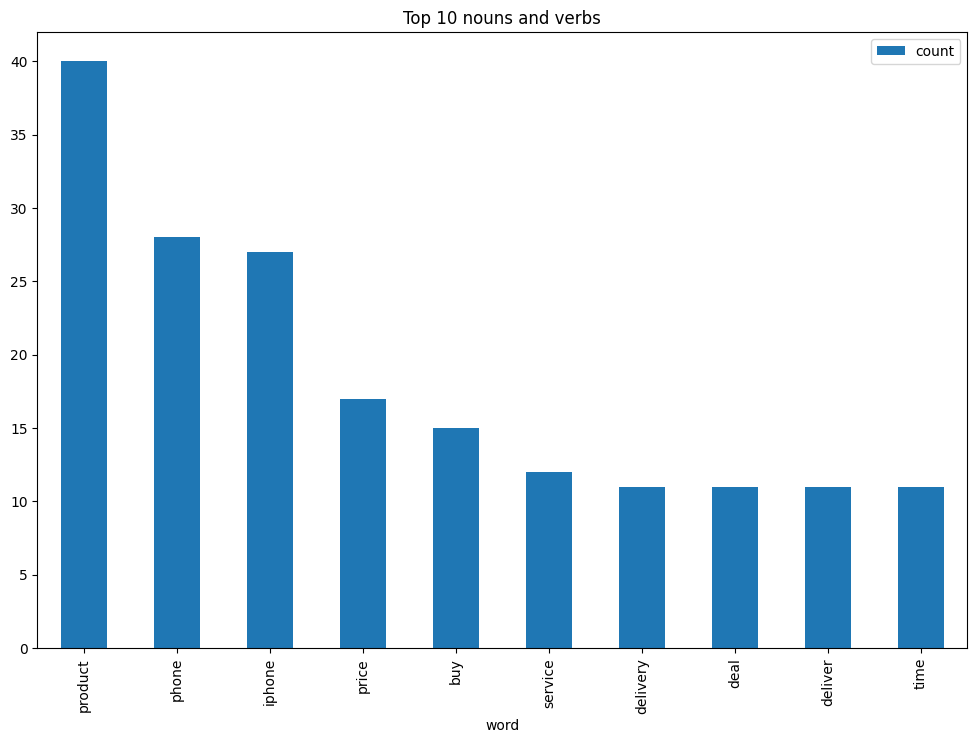

In [41]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

### Emotion Mining - Sentiment Analysis

In [55]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(Tweets))
sentences

NameError: name 'Tweets' is not defined

In [56]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Apple is looking at buying U.K. startup for $1...
1,Autonomous cars shift insurance liability towa...
2,San Francisco considers banning sidewalk deliv...
3,London is a big city in the United Kingdom.
4,Where are you?
5,Who is the president of France?
6,What is the capital of the United States?
7,When was Barack Obama born?


In [60]:
# Emotion Lexicon - Affin
affin=pd.rebad_csv(r"C:\Users\ravindra sharma\Desktop\excelrassignment\ExcelR assignment\DataSet\Afinn.csv",sep=',',encoding='Latin-1')
affin

,Palabra,Puntuacion,Word
0,a bordo,1.0,aboard
1,abandona,-2.0,abandons
2,abandonado,-2.0,abandoned
3,abandonar,-2.0,abandon
4,abatido,-2.0,dejected
...,...,...,...
2471,wowww,4.0,wowww
2472,wtf,-4.0,wtf
2473,yeees,2.0,yeees
2474,NaN,-2.0,blame


In [61]:
affin.head()

,Palabra,Puntuacion,Word
0,a bordo,1.0,aboard
1,abandona,-2.0,abandons
2,abandonado,-2.0,abandoned
3,abandonar,-2.0,abandon
4,abatido,-2.0,dejected


In [62]:
affin_scores=affin.set_index('Word')['Puntuacion'].to_dict()

affin_scores

{'aboard': 1.0,
 'abandons': -2.0,
 'abandoned': -2.0,
 'abandon': -2.0,
 'dejected': -2.0,
 'despondent': -3.0,
 'abhors': -3.0,
 'abhor': -3.0,
 'abhorrent': -3.0,
 'abhorred': -3.0,
 'embrace': 1.0,
 'hug': 2.0,
 'hugs': 2.0,
 'cherishes': 2.0,
 'absolve': 2.0,
 'acquit': 2.0,
 'absolving': 2.0,
 'acquitting': 2.0,
 'absorbed': 1.0,
 'engrossed': 1.0,
 'absolved': 2.0,
 'absolves': 2.0,
 'acquits': 2.0,
 'bored': -2.0,
 'boring': -3.0,
 'dull': -2.0,
 'bore': -2.0,
 'abused': -3.0,
 'abusive': -3.0,
 'abuse': -3.0,
 'abuses': -3.0,
 'profiteer': -2.0,
 'monopolizing': -2.0,
 'accidental': -2.0,
 'accidentally': -2.0,
 'accident': -2.0,
 'accidents': -2.0,
 'accepts': 1.0,
 'accepted': 1.0,
 'admitted': -1.0,
 'accept': 1.0,
 'accepting': 1.0,
 'cheers': 2.0,
 'clarifies': 2.0,
 'bullied': -2.0,
 'harried': -2.0,
 'bullying': -2.0,
 'active': 1.0,
 'asset': 2.0,
 'stabbed': -2.0,
 'agreement': 1.0,
 'accuses': -2.0,
 'accusation': -2.0,
 'accusations': -2.0,
 'accused': -2.0,
 'accus

In [64]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affin_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [65]:
# manual testing
calculate_sentiment(text='great')

3.0

In [79]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0    0.0
1    0.0
2   -2.0
3    1.0
4    0.0
5    0.0
6    0.0
7    0.0
Name: sentiment_value, dtype: float64

In [80]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0    10
1     7
2     7
3     9
4     3
5     6
6     8
7     5
Name: word_count, dtype: int64

In [81]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count,index
2,San Francisco considers banning sidewalk deliv...,-2.0,7,2
0,Apple is looking at buying U.K. startup for $1...,0.0,10,0
1,Autonomous cars shift insurance liability towa...,0.0,7,1
4,Where are you?,0.0,3,4
5,Who is the president of France?,0.0,6,5
6,What is the capital of the United States?,0.0,8,6
7,When was Barack Obama born?,0.0,5,7
3,London is a big city in the United Kingdom.,1.0,9,3


In [82]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    8.000000
mean    -0.125000
std      0.834523
min     -2.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000
Name: sentiment_value, dtype: float64

In [83]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count,index
0,Apple is looking at buying U.K. startup for $1...,0.0,10,0
1,Autonomous cars shift insurance liability towa...,0.0,7,1
2,San Francisco considers banning sidewalk deliv...,-2.0,7,2
4,Where are you?,0.0,3,4
5,Who is the president of France?,0.0,6,5
6,What is the capital of the United States?,0.0,8,6
7,When was Barack Obama born?,0.0,5,7


In [84]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count,index
3,London is a big city in the United Kingdom.,1.0,9,3


In [85]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Apple is looking at buying U.K. startup for $1...,0.0,10,0
1,Autonomous cars shift insurance liability towa...,0.0,7,1
2,San Francisco considers banning sidewalk deliv...,-2.0,7,2
3,London is a big city in the United Kingdom.,1.0,9,3
4,Where are you?,0.0,3,4
5,Who is the president of France?,0.0,6,5
6,What is the capital of the United States?,0.0,8,6
7,When was Barack Obama born?,0.0,5,7


C:\Users\ravindra sharma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='sentiment_value', ylabel='Density'>

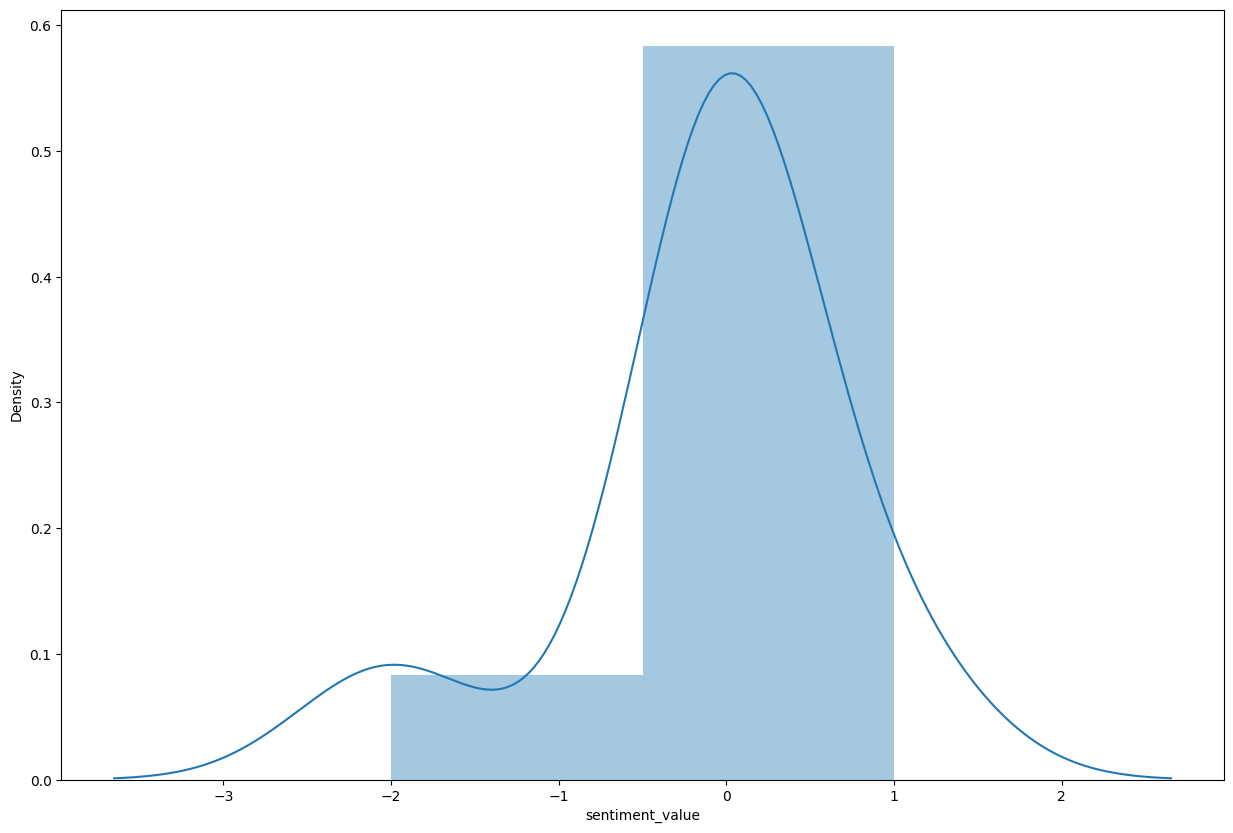

In [86]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot: xlabel='index', ylabel='sentiment_value'>

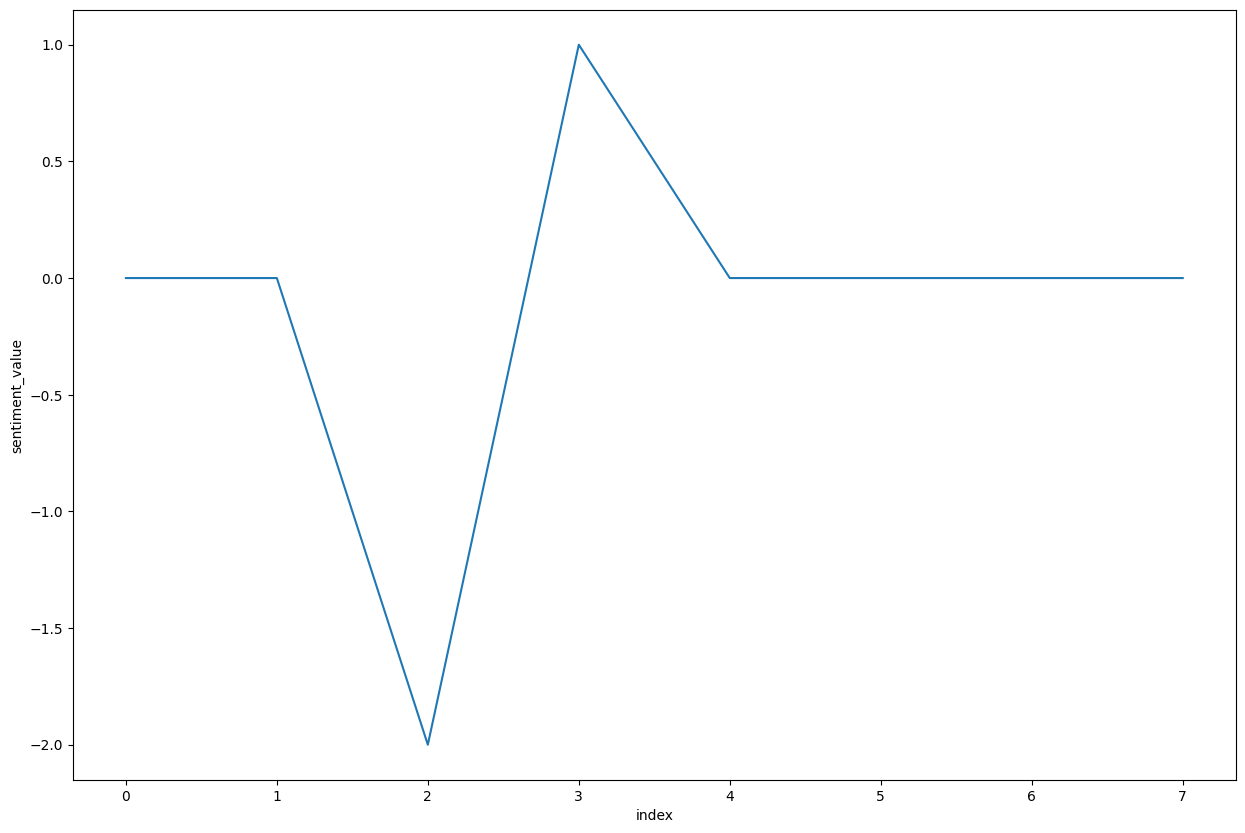

In [87]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

C:\Users\ravindra sharma\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

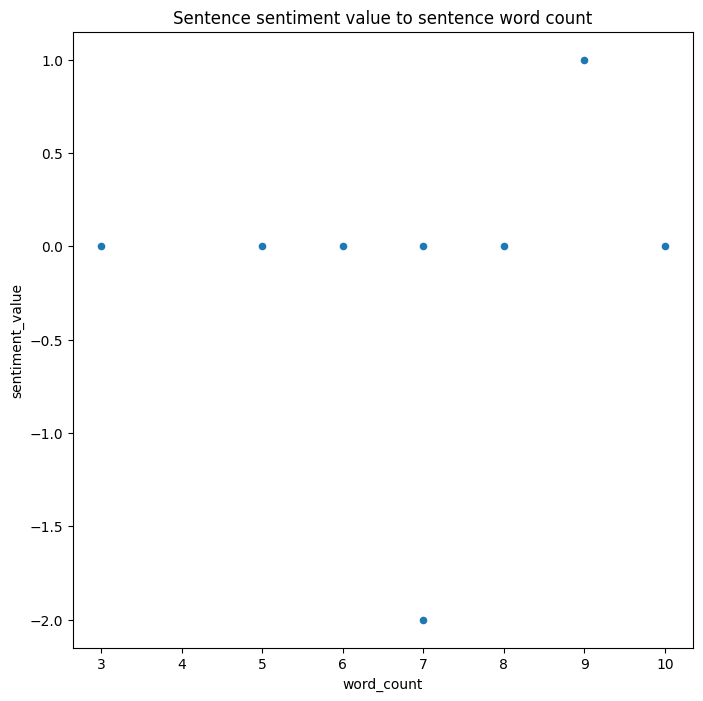

In [90]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [91]:
def sentiment_cat(row):
    
    '''This function returns sentiment category based on values in sentiment_value column'''
    
    if row['sentiment_value'] < 0:
        val = 'Negative'
    elif row['sentiment_value'] == 0: 
        val = 'Neutral'
    elif row['sentiment_value'] > 0:
        val = 'Positive'
    else:
        val = -1
    return val

In [92]:
sent_df['sentiment_category'] = sent_df.apply(sentiment_cat, axis=1)
sent_df.head()

,sentence,sentiment_value,word_count,index,sentiment_category
0,Apple is looking at buying U.K. startup for $1...,0.0,10,0,Neutral
1,Autonomous cars shift insurance liability towa...,0.0,7,1,Neutral
2,San Francisco considers banning sidewalk deliv...,-2.0,7,2,Negative
3,London is a big city in the United Kingdom.,1.0,9,3,Positive
4,Where are you?,0.0,3,4,Neutral


In [93]:
sent_df['sentiment_category'].value_counts()

Neutral     6
Negative    1
Positive    1
Name: sentiment_category, dtype: int64